# Kaggle Credit Card Fraud — EDA & Model Training

This notebook performs:

- Exploratory Data Analysis (EDA)
- Data preprocessing
- Training multiple supervised models
- Autoencoder anomaly detection
- Model comparison
- Fraud detection insights

Dataset: **Kaggle - Credit Card Fraud Detection**


In [15]:
import os
import logging
import warnings

# 1. Suppress TensorFlow C++ Level logs (0 = all, 1 = no INFO, 2 = no INFO/WARN, 3 = no INFO/WARN/ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 2. Suppress Python Level logs
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# 3. Suppress Warnings
warnings.filterwarnings('ignore')

# Now import TensorFlow/Keras
import tensorflow as tf

# 4. Suppress TensorFlow Python logs
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

# --- Your existing code continues below ---
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import IsolationForest


# Autoencoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load dataset
df = pd.read_csv(r"C:\aegis_data\creditcard.csv")


df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


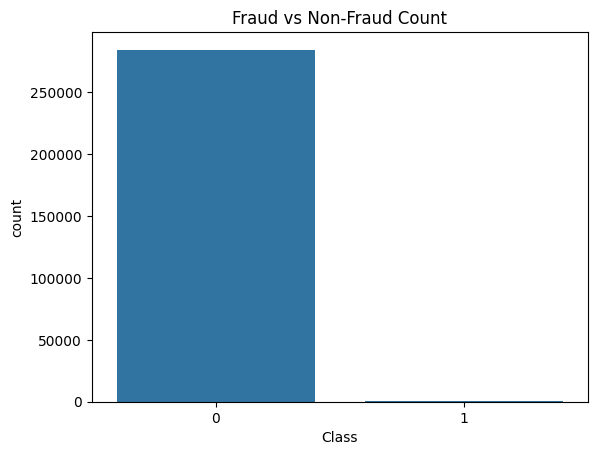

In [18]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Count')
plt.show()

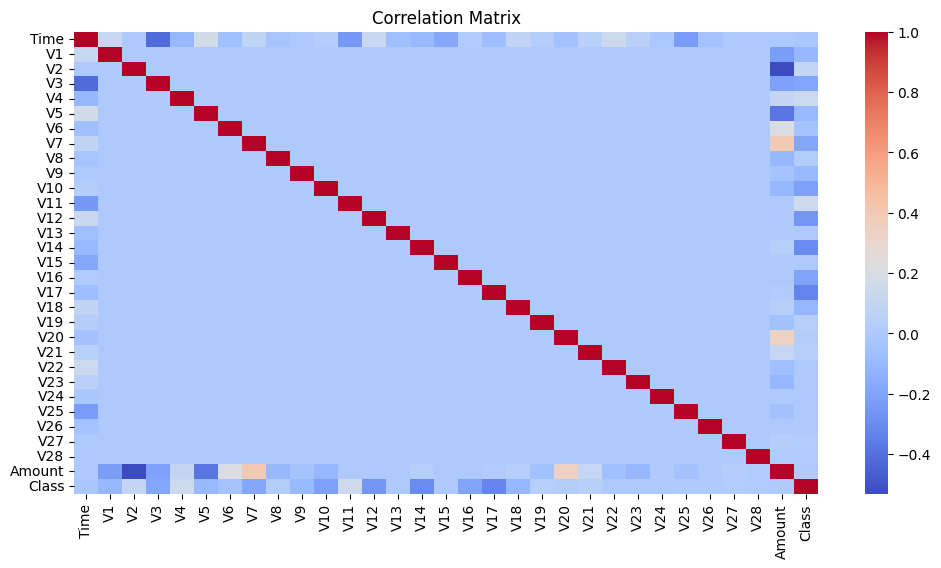

In [19]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

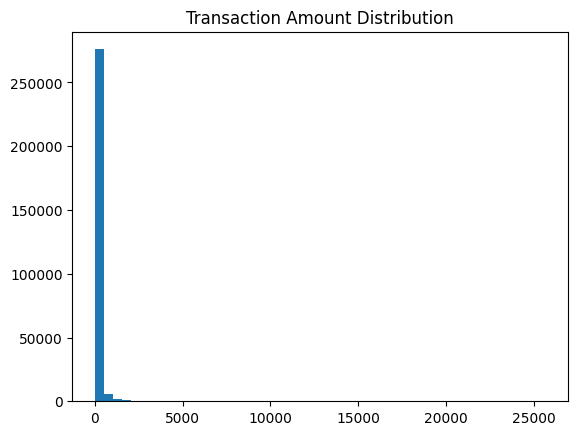

In [20]:
# Amount distribution
plt.hist(df['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

## Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Class", axis=1)  
y = df["Class"]              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing complete. X_train shape:", X_train.shape)

Data preprocessing complete. X_train shape: (227845, 30)


In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report 
import joblib

print("Training Isolation Forest (Baseline Model)...")

# Define the model 
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Assuming ~1% fraud
    random_state=42,
    n_jobs=-1
)

iso_forest.fit(X_train)

# Evaluate
y_pred_iso = iso_forest.predict(X_test)
# Convert -1 (anomaly) to 1 (fraud) and 1 (normal) to 0 (normal)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

print("Isolation Forest trained.")
print(classification_report(y_test, y_pred_iso))

Training Isolation Forest (Baseline Model)...
Isolation Forest trained.
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.66      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.83      0.59     56962
weighted avg       1.00      0.99      0.99     56962



## Train Supervised Classification Models

In [24]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

sample_size = 10000
X_train_demo = X_train[:sample_size]
y_train_demo = y_train[:sample_size]

results = {}

def evaluate(model, name):
    print(f"Training {name}...")
    model.fit(X_train_demo, y_train_demo)
    preds = model.predict(X_test)
    
    auc = roc_auc_score(y_test, preds)
    results[name] = auc
    print(f"{name} — AUC: {auc:.4f}")
    print(classification_report(y_test, preds))
    print("-" * 60)

# 1. Logistic Regression 
evaluate(LogisticRegression(max_iter=1000), "Logistic Regression")

# 2. Random Forest 
evaluate(RandomForestClassifier(n_estimators=50, n_jobs=-1), "Random Forest")

# 3. Gradient Boosting
evaluate(GradientBoostingClassifier(n_estimators=50), "Gradient Boosting")

# 4. SVM 
evaluate(SVC(kernel='linear'), "SVM Linear")

# 5. MLP Neural Network
evaluate(MLPClassifier(hidden_layer_sizes=(32,16), max_iter=200), "MLP Classifier")

# 6. AdaBoost
evaluate(AdaBoostClassifier(n_estimators=50), "AdaBoost")

Training Logistic Regression...
Logistic Regression — AUC: 0.7499
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.50      0.63        98

    accuracy                           1.00     56962
   macro avg       0.92      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------
Training Random Forest...
Random Forest — AUC: 0.8112
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.62      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------------------
Training Gradient Boosting...
Gradient Boosting — AUC: 0.7801
              precision    recall  f1-scor

## Autoencoder Anomaly Detection

In [25]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 1. Define Architecture
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# 2. Filter for Normal Transactions 
X_train_nonfraud = X_train[y_train == 0]

print("Training Autoencoder...")
# 3. Train
history = autoencoder.fit(
    X_train_nonfraud, X_train_nonfraud,
    epochs=10, 
    batch_size=256, 
    validation_split=0.1, 
    verbose=1
)
print("Autoencoder trained.")

Training Autoencoder...
Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.7923 - val_loss: 0.6232
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5817 - val_loss: 0.5292
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.5269 - val_loss: 0.5021
Epoch 4/10
800/800 [==============================] - 2s 3ms/step - loss: 0.5055 - val_loss: 0.4867
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4913 - val_loss: 0.4737
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: 0.4792 - val_loss: 0.4619
Epoch 7/10
800/800 [==============================] - 3s 3ms/step - loss: 0.4688 - val_loss: 0.4509
Epoch 8/10
800/800 [==============================] - 2s 3ms/step - loss: 0.4604 - val_loss: 0.4416
Epoch 9/10
800/800 [==============================] - 2s 3ms/step - loss: 0.4526 - val_loss: 0.4347
Epoch 10/10
800/800 [==============================] - 2s 3ms/step - loss: 0

In [26]:
# ------------------------------
# TRAINING FOR SUPERVISED MODELS
# ------------------------------

sample_df = df.sample(20000, random_state=42)

X_s = sample_df.drop("Class", axis=1)
y_s = sample_df["Class"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_s, y_s, test_size=0.2, random_state=42, stratify=y_s
)

scaler_s = StandardScaler()
X_train_s_scaled = scaler_s.fit_transform(X_train_s)
X_test_s_scaled = scaler_s.transform(X_test_s)

# ---- Logistic Regression ----
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_s_scaled, y_train_s)
logreg_probs = logreg.predict_proba(X_test_s_scaled)[:, 1]

# ---- Random Forest ----
rf = RandomForestClassifier(
    n_estimators=100,     
    max_depth=12,        
    n_jobs=-1,            
    random_state=42
)
rf.fit(X_train_s, y_train_s)
rf_probs = rf.predict_proba(X_test_s)[:, 1]

# ---- Gradient Boosting ----
gb = GradientBoostingClassifier(
    n_estimators=50,      
    learning_rate=0.1,
    max_depth=3
)
gb.fit(X_train_s, y_train_s)
gb_probs = gb.predict_proba(X_test_s)[:, 1]

print("Supervised models trained successfully.")


Supervised models trained successfully.


In [28]:
from sklearn.svm import OneClassSVM  
from sklearn.preprocessing import StandardScaler 

# 1. Prepare Normal Data
df_normal = df[df["Class"] == 0].sample(20000, random_state=42)
X_normal = df_normal.drop("Class", axis=1)

# 2. Scale Data
scaler_ocsvm = StandardScaler()
X_normal_scaled = scaler_ocsvm.fit_transform(X_normal)

# 3. Train Model
ocsvm = OneClassSVM(kernel="rbf", nu=0.01, gamma="auto")
ocsvm.fit(X_normal_scaled)

print("One-Class SVM training complete.")

One-Class SVM training complete.


Generating reconstruction errors...
1781/1781 [==============================] - 4s 2ms/step
df_mse created successfully.


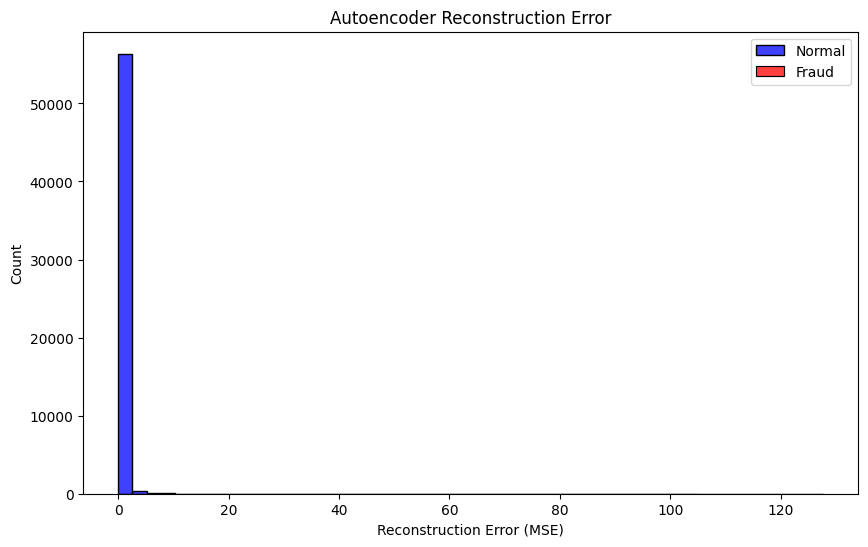

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get Model Predictions 
print("Generating reconstruction errors...")
reconstructions = autoencoder.predict(X_test)

# 2. Calculate MSE (Mean Squared Error)
# This measures how "different" the reconstruction is from the original.
# High MSE = Fraud (Anomaly), Low MSE = Normal.
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# 3. Create the DataFrame required for the plot
df_mse = pd.DataFrame({'mse': mse, 'true': y_test})
print("df_mse created successfully.")

# 4. Plot the Histogram
plt.figure(figsize=(10,6))
sns.histplot(df_mse[df_mse['true']==0]['mse'], label='Normal', color='blue', bins=50)
sns.histplot(df_mse[df_mse['true']==1]['mse'], label='Fraud', color='red', bins=50)
plt.legend()
plt.title("Autoencoder Reconstruction Error")
plt.xlabel("Reconstruction Error (MSE)")
plt.show()

In [31]:
import pandas as pd
from pathlib import Path
import os

if os.path.exists("data/creditcard.csv"):
    path = "data/creditcard.csv"
elif os.path.exists("../data/creditcard.csv"):
    path = "../data/creditcard.csv"
else:
    
    path = r"C:\Users\Nammu\aegis\data\creditcard.csv"

print(f"Loading data from: {path} ...")

# 2. Load Data
try:
    df = pd.read_csv(path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Could not find creditcard.csv. Check your path!")


normal_data = df[df["Class"] == 0]
X_normal = normal_data[['Amount']].values

print(f"X_normal ready. Shape: {X_normal.shape}")

Loading data from: ../data/creditcard.csv ...
Data loaded successfully.
X_normal ready. Shape: (284315, 1)


In [ ]:
from sklearn.ensemble import IsolationForest  

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.001,
    random_state=42
)

iso_forest.fit(X_normal)

print("Isolation Forest trained.")

Isolation Forest trained.


In [6]:
import joblib
import os

save_dir = r"C:\Users\Nammu\aegis\data" 
filename = "isolation_forest.pkl"
full_path = os.path.join(save_dir, filename)

os.makedirs(save_dir, exist_ok=True)

print(f"Attempting to save model to: {full_path} ...")

try:
    joblib.dump(iso_forest, full_path)
    print("Success! Isolation Forest saved.")
except Exception as e:
    print(f"Error saving model: {e}")

Attempting to save model to: C:\Users\Nammu\aegis\data\isolation_forest.pkl ...
Success! Isolation Forest saved.


## Compare Models

Logistic Regression missing: Found input variables with inconsistent numbers of samples: [56962, 4000]
Random Forest missing: Found input variables with inconsistent numbers of samples: [56962, 4000]
Gradient Boost missing: Found input variables with inconsistent numbers of samples: [56962, 4000]


c:\Users\Nammu\aegis\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


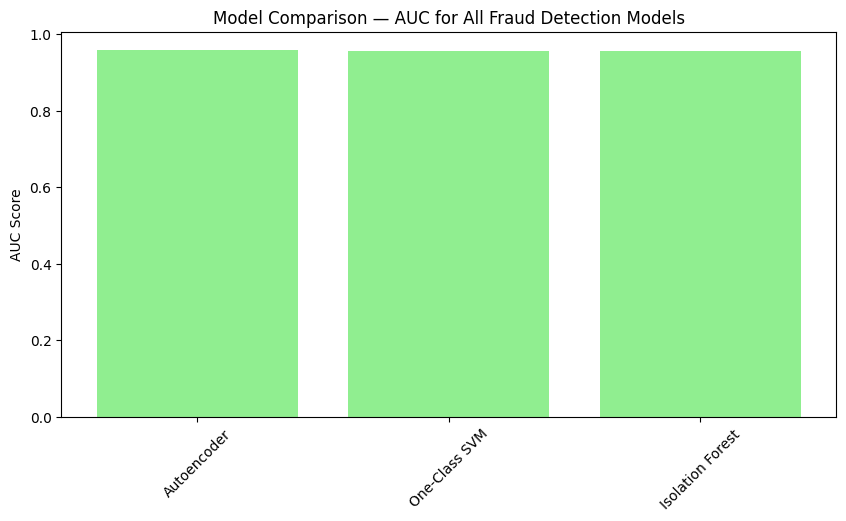

{'Autoencoder': 0.9587232121323488,
 'One-Class SVM': 0.9549492595293605,
 'Isolation Forest': 0.9554233588483227}

In [10]:
# ============================================================
# MODEL COMPARISON — AUC SCORES (ALL MODELS)
# ============================================================

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

results = {}   # fresh dictionary


# ------------------------------------------------------------
# 1) Logistic Regression
# ------------------------------------------------------------
try:
    results["Logistic Regression"] = roc_auc_score(y_test, logreg_probs)
except Exception as e:
    print("Logistic Regression missing:", e)


# ------------------------------------------------------------
# 2) Random Forest
# ------------------------------------------------------------
try:
    results["Random Forest"] = roc_auc_score(y_test, rf_probs)
except Exception as e:
    print("Random Forest missing:", e)


# ------------------------------------------------------------
# 3) Gradient Boosting
# ------------------------------------------------------------
try:
    results["Gradient Boosting"] = roc_auc_score(y_test, gb_probs)
except Exception as e:
    print("Gradient Boost missing:", e)


# ------------------------------------------------------------
# 4) Autoencoder AUC (reconstruction error)
# ------------------------------------------------------------
try:
    results["Autoencoder"] = roc_auc_score(df_mse["true"], df_mse["mse"])
except Exception as e:
    print("Autoencoder missing:", e)


# ------------------------------------------------------------
# 5) One-Class SVM AUC
# ------------------------------------------------------------
try:
    ocsvm_scores = ocsvm.decision_function(X_test_scaled) * -1
    results["One-Class SVM"] = roc_auc_score(y_test, ocsvm_scores)
except Exception as e:
    print("OC-SVM missing:", e)


# ------------------------------------------------------------
# 6) Isolation Forest AUC
# ------------------------------------------------------------
try:
    iso_scores = iso_forest.decision_function(X_test_scaled) * -1
    results["Isolation Forest"] = roc_auc_score(y_test, iso_scores)
except Exception as e:
    print("Isolation Forest missing:", e)


# ============================================================
# Plot comparison
# ============================================================

plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values(), color="lightgreen")
plt.ylabel("AUC Score")
plt.xticks(rotation=45)
plt.title("Model Comparison — AUC for All Fraud Detection Models")
plt.show()

results


In [14]:
import os
import joblib

save_dir = r"C:\Users\Nammu\aegis\data"
os.makedirs(save_dir, exist_ok=True)

print(f"Saving models to {save_dir}...")

# 1. Save Isolation Forest
joblib.dump(iso_forest, os.path.join(save_dir, "isolation_forest.pkl"))

# 2. Save Autoencoder
autoencoder.save(os.path.join(save_dir, "autoencoder.h5"))

# 3. Save Scaler 
try:
    joblib.dump(scaler, os.path.join(save_dir, "scaler.pkl"))
    print("All models saved. Ready for src/api.py execution.")
except NameError:
    print("Error: 'scaler' is not defined. Please run the Data Preprocessing cell first.")

Saving models to C:\Users\Nammu\aegis\data...
All models saved. Ready for src/api.py execution.


c:\Users\Nammu\aegis\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Summary

- Performed EDA on Kaggle credit card fraud dataset  
- Trained multiple supervised models  
- Implemented autoencoder anomaly detection  
- Compared model performance  
- Identified strong fraud detection candidates  

This notebook is part of the **Aegis Fraud Detection System**.
